In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Artist tutorial

Using Artist objects to render on the canvas.

There are three layers to the matplotlib API.

- the `matplotlib.backend_bases.FigureCanvas` is the area onto which the figure is drawn
- the `matplotlib.backend_bases.Renderer` is the object which knows how to draw on the FigureCanvas
- and the `matplotlib.artist.Artist` is the object that knows how to use a renderer to paint onto the canvas.

**Artist handles all the high level constructs** like representing and laying out the figure, text, and lines.

## two types of Artists: primitives and containers
- The primitives represent the standard graphical objects we want to paint onto our canvas: **Line2D, Rectangle, Text, AxesImage**, etc., 
- and the containers are places to put them (Axis, Axes and Figure).

## standard use
The **standard use** is to create a Figure instance, use the Figure to create one or more Axes or Subplot instances, and use the Axes instance helper methods to create the primitives.

## example

### Create a `Figure` instance

In the example below, we create a Figure instance using `matplotlib.pyplot.figure()`, which is a convenience method for **instantiating Figure instances and connecting them with your user interface or drawing toolkit FigureCanvas**.

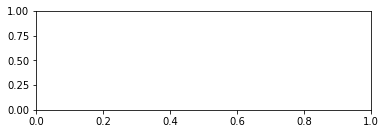

In [18]:
fig = plt.figure()
ax = fig.add_subplot(2,1,1) # ax is a Axes container instance

### Work with `Axes`

Axes is the **plotting area** into which most of the objects go, and the Axes has many special **helper methods (plot(), text(), hist(), imshow())** to create the most common graphics **primitives** (Line2D, Text, Rectangle, Image, respectively).

These helper methods will take your data (e.g., numpy arrays and strings) and create primitive Artist instances as needed (e.g., Line2D), add them to the relevant containers, and draw them when requested.

If you want to **create an Axes at an arbitrary location**, simply use the `add_axes()` method which takes a list of [left, bottom, width, height] values in 0-1 relative figure coordinates:

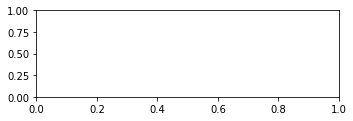

In [17]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0.15, 0.1, 0.7, 0.3])

In this example, ax is the Axes instance created by the `fig.add_subplot` call above (remember Subplot is just a subclass of Axes) and when you call `ax.plot`, it **creates a Line2D instance and adds it to the Axes.lines list.**

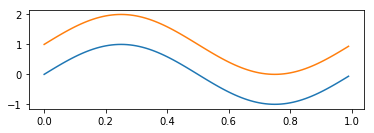

In [54]:
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line1, line2 = ax.plot(t, s, t, s+1)

In [56]:
ax.get_lines()

<a list of 2 Line2D objects>

In [32]:
line

The Axes also has helper methods to **configure and decorate the x-axis and y-axis tick, tick labels and axis labels**:

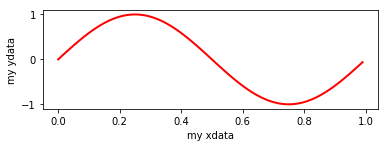

In [33]:
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax.plot(t, s, color='red', lw=2)

xtext = ax.set_xlabel('my xdata') # returns a Text instance
ytext = ax.set_ylabel('my ydata')

When you call `ax.set_xlabel`, it passes the information on the Text instance of the XAxis. **Each Axes instance contains an XAxis and a YAxis instance, which handle the layout and drawing of the ticks, tick labels and axis labels.**

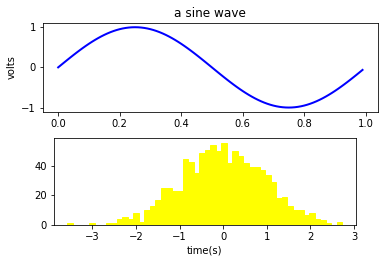

In [43]:
fig = plt.figure()
fig.subplots_adjust(top=0.8)
ax1 = fig.add_subplot(211)
ax1.set_ylabel('volts')
ax1.set_title('a sine wave')

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax1.plot(t, s, color='blue', lw=2)

np.random.seed(198204)

ax2 = fig.add_axes([0.15, 0.1, 0.7, 0.3])
n, bins, patches = ax2.hist(np.random.randn(1000), 50, facecolor='yellow', edgecolor='yellow')

ax2.set_xlabel('time(s)')

plt.show()

### Work with Axis

**Each Axes instance contains an XAxis and a YAxis instance, which handle the layout and drawing of the ticks, tick labels and axis labels.**

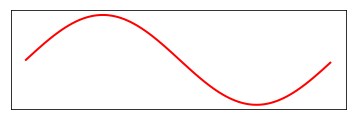

In [64]:
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax.plot(t, s, color='red', lw=2)

xaxis = ax.get_xaxis()  # same as ax.axis
yaxis = ax.get_yaxis()  # same as ax.yaxis
xaxis.set_visible(False)
yaxis.set_visible(False)

## Object containers

Attributes of each container can be accessed by simple setter and getter function.

[<matplotlib.axes._subplots.AxesSubplot object at 0x000002726D6E7CF8>, <matplotlib.axes._subplots.AxesSubplot object at 0x000002726D6CDEB8>]


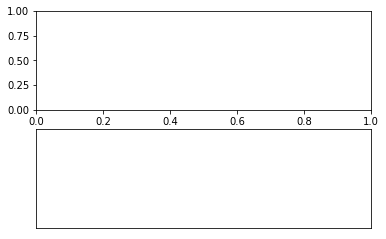

In [59]:
fig = plt.figure()
fig.add_subplot(211)
fig.add_subplot(212)
print(fig.get_axes())
ax = fig.get_axes()[1]
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

### Figure container

The top level container Artist is the `matplotlib.figure.Figure`, and **it contains everything in the figure**. The background of the figure is a Rectangle which is stored in `Figure.patch`. As you add subplots (add_subplot()) and axes (add_axes()) to the figure these will be appended to the `Figure.axes`.

[<matplotlib.axes._subplots.AxesSubplot object at 0x000002726D2D2CF8>, <matplotlib.axes._axes.Axes object at 0x000002726C1A4240>]


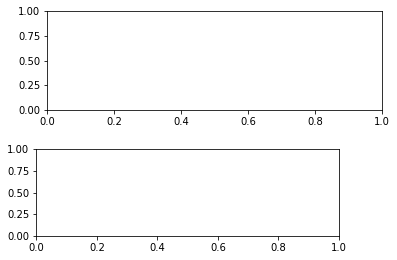

In [50]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.3])

print(fig.axes) # two axes

Because the **figure maintains the concept of the "current axes"** (see Figure.gca and Figure.sca) to support the pylab/pyplot state machine, you should not **insert or remove axes** directly from the axes list, but rather use the **add_subplot() and add_axes() methods to insert, and the delaxes() method to delete.**

**Here is a summary of the Artists the figure contains**

|Figure attribute|Description|
| :----------- | :----------- |
|axes	|A list of Axes instances (includes Subplot)|
|patch	|The Rectangle background|
|images	|A list of FigureImages patches - useful for raw pixel display|
|legends	A list of Figure Legend instances (different from Axes.legends)|
|lines	|A list of Figure Line2D instances (rarely used, see Axes.lines)|
|patches|	A list of Figure patches (rarely used, see Axes.patches)|
|texts	|A list Figure Text instances|

### Axes container

The `matplotlib.axes.Axes` is the center of the matplotlib universe -- it contains the vast majority of all the **Artists** used in a figure with many **helper methods** to create and add these Artists to itself, as well as helper methods to access and customize the Artists it contains.

it contains a `Patch patch` which is a Rectangle for Cartesian coordinates and a Circle for polar coordinates; this patch **determines the shape, background and border of the plotting region**

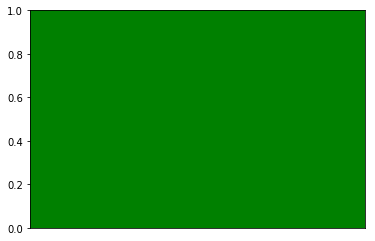

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.patch
rect.set_facecolor('green')

|Helper method|	Artist|	Container|
| ----------- | ----- | -------- |
|ax.annotate - text annotations|	Annotate|	ax.texts|
ax.bar - bar charts|	Rectangle|	ax.patches|
ax.errorbar - error bar plots|	Line2D and Rectangle|	ax.lines and ax.patches|
ax.fill - shared area|	Polygon|	ax.patches|
ax.hist - histograms|	Rectangle|	ax.patches|
ax.imshow - image data|	AxesImage|	ax.images|
ax.legend - axes legends|	Legend|	ax.legends|
ax.plot - xy plots|	Line2D|	ax.lines|
ax.scatter - scatter charts|	PolygonCollection|	ax.collections|
ax.text - text|	Text|	ax.texts|

Below is a summary of the Artists that the Axes contains

|Axes attribute|	Description|
| ------------ | ------------- |
|artists|	A list of Artist instances|
|patch|	Rectangle instance for Axes background|
|collections|	A list of Collection instances|
|images|	A list of AxesImage|
|legends|	A list of Legend instances|
|lines|	A list of Line2D instances|
|patches|	A list of Patch instances|
|texts|	A list of Text instances|
|xaxis|	matplotlib.axis.XAxis instance|
|yaxis|	matplotlib.axis.YAxis instance|

Add or delete axes container:

use the **add_subplot() and add_axes() methods to insert, and the delaxes() method to delete.**

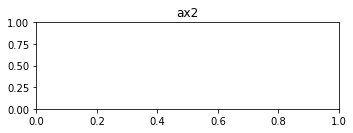

In [63]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.set_title('ax1')
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.3])
ax2.set_title('ax2')
fig.delaxes(ax1)

### Axis container

The `matplotlib.axis.Axis` instances handle the drawing of the **tick lines, the grid lines, the tick labels and the axis label**. You can configure the left and right ticks separately for the **y-axis**, and the upper and lower ticks separately for the **x-axis**.

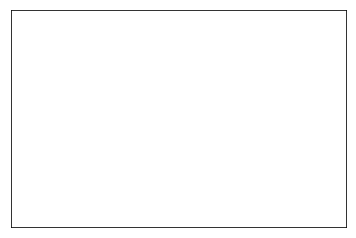

In [53]:
fig, ax = plt.subplots()
xaxis = ax.xaxis
yaxis = ax.yaxis

xaxis.set_visible(False)
yaxis.set_visible(False)